# Ising Model

In [45]:
import scipy         # Another numerical library

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

## 1D Ising

A 1D Ising model is composed of a chain of interacting spins. In its simplest version, the interaction is limited to the nearest neighbors so that the energy is given by

$$
E = -J\sum_i s_i s_{i + 1}\,,
$$

where $s_i = \pm 1$ is the spin on the $i$ th site and $J > 0$. One can see that the energy is minimized if all the spins point in the same direction.

As you will learn later in more detail in your courses, spins also interact with the magnetic field $\mathbf{B}$. Aligning spins with the magnetic field lowers their energy. Therefore, we can extend our energy expression as

$$
E = -J\sum_i s_i s_{i + 1} - B \sum_i s_i\,.
$$

This means that if $B>0$, up-spins will be favored energetically; if $B<0$, down-spins will be preferred.

In this problem, we will encounter three energy parameters: $J$, $B$ and $k_B T$. As a matter of convenience, we can express all the energies in the system in terms of the spin-spin interaction $J$. This amounts to setting $J = 1$ so that

$$
E = -\sum_i s_i s_{i + 1} - B \sum_i s_i\,.
$$

This way, we don't have to worry about the actual magnitudes of $B$ and $k_B T$. Instead, we care about how they compare to $J$.

#### IMPORTANT:

In each of the following questions use the results of the earlier questions, when applicable! Don't reinvent the wheel!

#### Question 1

Before we start playing with the spin system, we need to create it. Write a function that takes the number of spins in the chain $N$ and returns a random configuration of spins. It is most convenient to represent the spin configuration as a list of $\pm 1$'s.

In [46]:
def random_spins_chain(N):
    spins = np.zeros(N)
    for i in range(N):
        spins[i] = 1 if np.random.random() > 0.5 else -1
    return spins

#### Question 2

Each spin, except the two at the edges, has two neighbors (one on the left and one on the right). To avoid edge effects, we will turn the atomic chain into a circle so that the first and the last spins become adjacent. This way, *every* spin has two neighbors.

As we discussed in class, spins can spontaneously flip due to the interaction with the environment. We are going to write a function that will try to flip a single spin in the chain. It will take four parameters: the chain array, the index of the spin that we are trying to flip, $B$, and the temperature $k_B T$.  Remember that we set $J = 1$ in the expression for the energy above.

Don't forget about the ring structure of the chain! (Modulo is your friend!)


The flipping will be perfomed using a variation of the acceptance-rejection method. It goes as follows:
1. Compare the energies of the original configuration and the one with the flipped spin.
2. If $\Delta E = E_\mathrm{flipped} - E_\mathrm{original} < 0$, the flipped configuration is energetically preferred. Therefore, return this configuration.
3. Otherwise, draw a random number $p \in [0,1]$ and compare $e^{-\Delta E/(k_BT)}$ to it. If $e^{-\Delta E/(k_BT)} > p$, return the flipped configuration. Otherwise, return the original one.

In [47]:
def calculate_E(chain, B):
    shifted_chain = np.roll(chain, 1)
    return -np.sum(chain * shifted_chain) - (B * np.sum(chain))

def flip_spin(chain, idx, B, k_bT):
    flipped_chain = chain.copy()
    flipped_chain[idx] = -flipped_chain[idx]

    delta_E = calculate_E(flipped_chain, B) - calculate_E(chain, B)
    if delta_E < 0:
        return flipped_chain
    else:
        p = np.random.random()
        if np.exp(-delta_E / k_bT) > p:
            return flipped_chain
        else:
            return chain

Finally, we can use the result of **Question 2** to try to flip the spins throughout the system.


#### Question 3
Write a function that cycles over all the spins in the chain and tries to flip them. This function should take the spin configuration, $B$, and $k_B T$ as inputs.

In [48]:
def flip_spins(chain, B, k_bT):
    flipped_chain = chain.copy()
    for idx in range(len(flipped_chain)):
        flipped_chain = flip_spin(flipped_chain, idx, B, k_bT)
    return flipped_chain

### Intermission

At this point, stand up, relax a bit. You are done with the "dumb" portion of this part of the project. Make sure you understand what the functions you have so far can do.

Next, we're going to make some science!

### Intermission Over

So far we know the following:
1. Spins prefer to align with their neighbors
2. Spins prefer to point in the direction of the magnetic field
3. Temperature messes up the order

We would like to quantify the order in our system. To this end, we define a quantity called *magnetization*, given by

$$
M = \frac{1}{N}\sum_i s_i\,,
$$

where $N$ is the total number of spins in the system.

If $M = \pm 1$, all spins are aligned and point either up ($M = 1$) or down ($M = -1$). Other values of $M$ mean that the spins are not completely aligned. We want to know how magnetized a system becomes for different values of $k_B T$ and $B$. To answer this question, we will proceed as follows:

1. First, we will generate a random chain of some length
2. We will then apply the function you wrote in **Question 3** repeatedly to this chain. Each application corresponds to a time step.
3. After a sufficiently long time, we assume that the magnetization will settle on some number and won't change (aside from some small fluctuations due to the temperature).
4. At this point, we can compute the magnetization of the system.
5. We can repeat this process several times to make sure we get consistent results. Maybe take an average of several realizations at the same $k_B T$, $B$, and $N$.
6. Finally, we can perform this at different $k_B T$ and $B$ to see the role that the temperature and the magnetic field have on magnetization.

Your goal here is to obtain plots of $M$ *vs.* $B$ for several representative values of $k_B T$. What do you see? Can you get your system to have a finite $M$ at any $T$ for $B = 0$? Describe your results.

*Suggestion: Once you know that you are running your simulations for enough time steps, play with $k_B T$ and $B$. Explore. Make the temperature really small and really large. What changes? This is your virtual lab, mess with the system!*


It turns out that we know the analytical result for the magnetization in 1D:

$$
M = \frac{\sinh\left(\frac{B}{k_B T}\right)}{\sqrt{e^{-\frac{4 J}{k_BT}} + \sinh^2\left(\frac{B}{k_B T}\right)}}\,.
$$

Show that your results agree with the formula.


In [49]:
def simulate(N, steps, B, k_bT):
    chain = random_spins_chain(N)
    for _ in range(steps):
        chain = flip_spins(chain, B, k_bT)

    return np.sum(chain) / N

I defined a helper function that takes in the size of the chain, the number of steps to run for and the temperature and magnetic field. It creates a random chain of that size and then flips the spins "step" times. It returns the magnetization at the end of the simulation.

In [50]:
N = 100
B = 1
k_bT = 10

steps_list = list(range(5, 30, 5))

for steps in steps_list:
    Ms = simulate(N, steps, B, k_bT)
    print(f"steps = {steps} -> M = {Ms}")

steps = 5 -> M = 0.16
steps = 10 -> M = 0.14
steps = 15 -> M = -0.02
steps = 20 -> M = 0.02
steps = 25 -> M = 0.18


In order to decide how many steps to run the simulations for, I ran the simulation with a chain of size $100$, $B = 1$, and $k_BT = 10$ with various steps. For each of these steps it prints the magnetization. From the output, $20$ steps seems to be good enough to get the magnetization to stabilise.

In [51]:
import multiprocessing

I use the `multiprocessing` library to speed up the simulation by using multiple threads to do parts of the simulation at the same time. 

In [52]:
N = 100
steps = 20

points = 50
Bs = np.linspace(-50, 50, points)
k_bTs = np.linspace(0.01, 50, points) 

def sub_res_simulator(args):
    res, idx, B = args
    sub_res = [simulate(N, steps, B, k_bT) for k_bT in k_bTs]
    res[idx] = sub_res

with multiprocessing.Manager() as manager:
    res = manager.list([None] * points)
    with multiprocessing.Pool(processes = 12) as pool:
        pool.map(sub_res_simulator, [(res, idx, B) for idx, B in enumerate(Bs)])
    res = list(res)

I run the simulation for a chain of size $100$ for $20$ steps with various values for $B$ and $k_BT$. I choose $50$ equally spaced points for $B$ (ranging from $-50$ to $50$) and $k_BT$ (raninge from $0.01$ to $50$). I run the simulation for each pair of $B$ and $k_BT$ and store the results in a $50 \times 50$ matrix. 

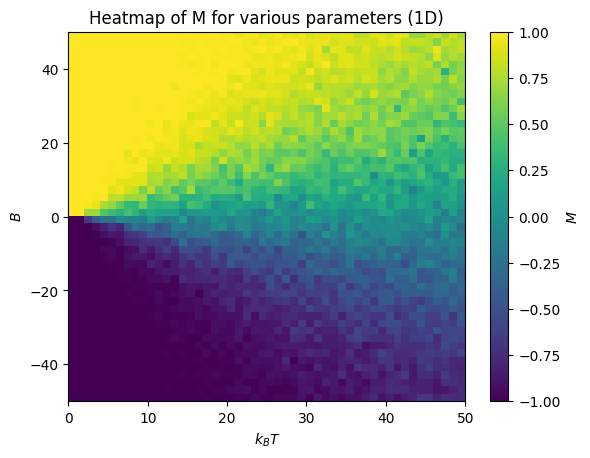

In [53]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(res, origin = "lower", aspect = "auto", extent= [0, 50, -50, 50])
ax.set(xlabel = "$k_BT$", ylabel = "$B$", title = "Heatmap of M for various parameters (1D)")
plt.colorbar(im, ax = ax, label = "$M$")
plt.show()

The heatmap shows the value of $M$ for each pair of $B$ and $k_BT$. We can see from this heatmap that the values of $M$ range from $-1$ to $1$. 

When the values of $k_BT$ are small, the value of $M$ becomes $1$ when $B$ is positive and $0$ when $B$ is negative. This makes sense because the lowest energy configuration is when all the spins are aligned with each other and the magnetic field.

Between the yellow area ($M = 1$) in the top left corner and the purple area ($M = -1$) in the bottom left corner, we can see that the color changes away from $1$ and $-1$ to $0$. This is because when the values of $k_BT$ are large, the higher temperature causes some of the spins to flip, increasing the instability of the system.

These results are consistent with the analytical result for the magnetization in 1D. When the ratio $\frac{B}{k_BT}$ is large, the value of $M$ is close to $1$ or $-1$. When the ratio $\frac{B}{k_BT}$ is small, the value of $M$ is close to $0$.

Furthermore, when the ratio $\frac{B}{k_BT}$ is equal to $1$ (and with $k_BT = 20$ and $J = 1$), the value of $M$ evaluates to around $0.83$ which is consistent with the heatmap.

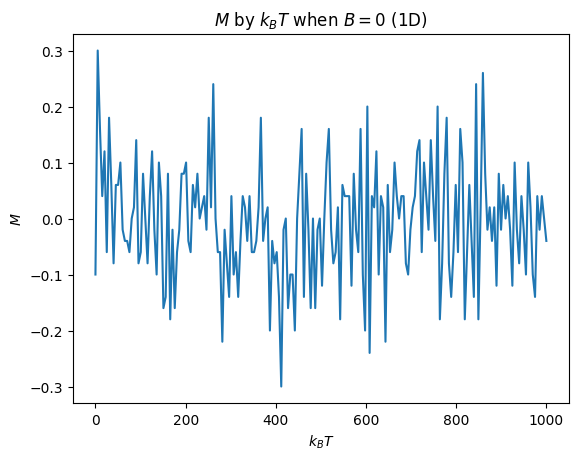

In [54]:
N = 100
steps = 20

B = 0
points = 200
k_bTs = np.linspace(0.01, 1000, points) 

res_kBT = [simulate(N, steps, B, k_bT) for k_bT in k_bTs]

fig, ax = plt.subplots(1, 1)
ax.plot(k_bTs, res_kBT)
ax.set(xlabel = "$k_BT$", ylabel = "$M$", title = "$M$ by $k_BT$ when $B = 0$ (1D)")
plt.show()

The graph above shows $M$ as a function of $k_BT$ (with $200$ values ranging from $0.01$ to $1000$) for $B = 0$. We can see that the value of $M$ is close to $0$ for all values of $k_BT$. This is consistent with the analytical result for the magnetization in 1D. When there is no magnetic field, there is no preferred direction for the spins and so they are not aligned in the same direction. 

## 2D Ising

Now that you are experts in the 1D Ising model, we move to two dimensions. Here, instead of being arranged in a line, the spins are positioned on a square lattice. This means that instead of two neighbors, each atom (except the edges) has four. The energy, in this case, becomes:

$$
E = -\sum_{\langle ij\rangle} s_i s_{j} - B \sum_i s_i\,,
$$

where $\langle ij\rangle$ means that we grab the spins of neighbors only.

As before, we want to avoid edge effects, so we make our system periodic. Before, we turned our chain into a ring; now we turn the square lattice into a doughnut (or donut, if you prefer) so that each lattice site gets four neighbors.

#### Questions:

Repeat **Questions 1** -- **3** for the 2D case. After that, proceed with the analysis like you did with the 1D case. Can you get you system to magnetize at any $T$ for $B = 0$?

In [55]:
def random_spins_lattice(N):
    chain = random_spins_chain(N ** 2)
    return chain.reshape(N, N)
    
def calculate_E_2D(lattice, B):
    left = lattice * np.roll(lattice, -1, axis = 1)
    right = lattice * np.roll(lattice, 1, axis = 1)
    up = lattice * np.roll(lattice, -1, axis = 0)
    down = lattice * np.roll(lattice, 1, axis = 0)
    return -np.sum(left + right + up + down) - (B * np.sum(lattice))

def flip_spin_2D(lattice, idx, B, k_bT):
    flipped_lattice = lattice.copy()
    flipped_lattice[idx] = -flipped_lattice[idx] # index here is a pair

    delta_E = calculate_E_2D(flipped_lattice, B) - calculate_E_2D(lattice, B)
    if delta_E < 0:
        return flipped_lattice
    else:
        p = np.random.random()
        if np.exp(-delta_E / k_bT) > p:
            return flipped_lattice
        else:
            return lattice

def flip_spins_2D(lattice, B, k_bT):
    flipped_lattice = lattice.copy()
    n, _ = flipped_lattice.shape
    for i in range(n):
        for j in range(n):
            flipped_lattice = flip_spin_2D(flipped_lattice, (i, j), B, k_bT)
    return flipped_lattice

def simulate_2D(N, steps, B, k_bT):
    lattice = random_spins_lattice(N)
    for _ in range(steps):
        lattice = flip_spins_2D(lattice, B, k_bT)

    return np.sum(lattice) / (N ** 2)

The above cell is copied and modified to work for a 2D Ising model. Mainly, the chain is changed to a lattice of spins and we consider all four neighbors of each spin when calcualting the energies and deciding whether to flip the spins.

In [56]:
N = 50
steps = 20

points = 50
Bs = np.linspace(-50, 50, points)
k_bTs = np.linspace(0.01, 50, points)

def sub_res_simulator_2D(args):
    res_2D, idx, B = args
    sub_res = [simulate_2D(N, steps, B, k_bT) for k_bT in k_bTs]
    res_2D[idx] = sub_res

with multiprocessing.Manager() as manager:
    res_2D = manager.list([None] * points)
    with multiprocessing.Pool(processes = 12) as pool:
        pool.map(sub_res_simulator_2D, [(res_2D, idx, B) for idx, B in enumerate(Bs)])
    res_2D = list(res_2D)

I run the 2D simulation for a lattice of size $50 \times 50$ for $20$ steps with various values for $B$ and $k_BT$. Similar to the 1D simulation, I choose $50$ equally spaced points for $B$ (ranging from $-50$ to $50$) and $k_BT$ (ranging from $0.01$ to $50$). I run the simulation for each pair of $B$ and $k_BT$ and store the results in a $50 \times 50$ matrix. 

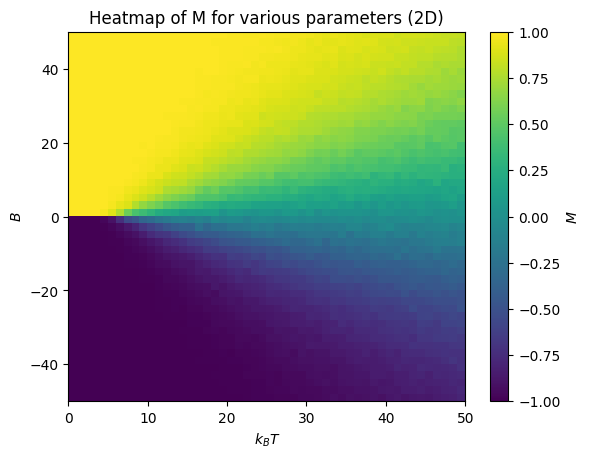

In [57]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(res_2D, origin = "lower", aspect = "auto", extent= [0, 50, -50, 50])
ax.set(xlabel = "$k_BT$", ylabel = "$B$", title = "Heatmap of M for various parameters (2D)")
plt.colorbar(im, ax = ax, label = "$M$")
plt.show()

The heatmap shows the value of $M$ for each pair of $B$ and $k_BT$ for the 2D simulation. Notice that the heatmap looks like the one for the 1D simulation. The two simulations behave the same due to the fact that the interactions between the spins are similar in nature. 

However, there is a slight difference in the values and it seems like there is a greater inclination towards $1$ and $-1$ in the 2D simulation compared to the 1D simulation. This is because in the 2D simulation, the spins have more neighbors and so there is a greater tendency for the spins to align with each other.

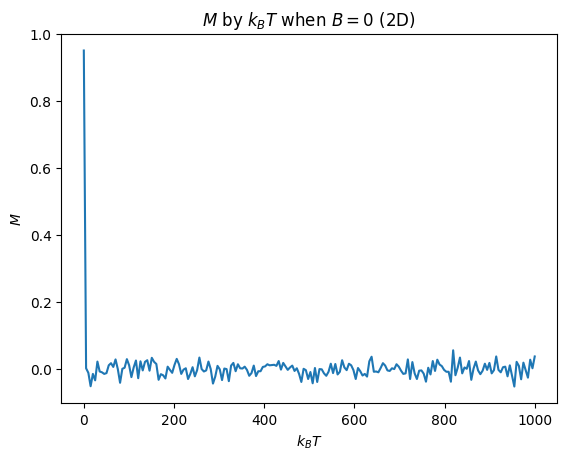

In [58]:
N = 50
steps = 20

B = 0
points = 200
k_bTs = np.linspace(0.01, 1000, points) 

res_kBT_2D = [simulate_2D(N, steps, B, k_bT) for k_bT in k_bTs]

fig, ax = plt.subplots(1, 1)
ax.plot(k_bTs, res_kBT_2D)
ax.set(xlabel = "$k_BT$", ylabel = "$M$", title = "$M$ by $k_BT$ when $B = 0$ (2D)")
plt.show()

The graph above shows $M$ as a function of $k_BT$ (with $200$ values ranging from $0.01$ to $1000$) for $B = 0$ for the 2D simulation. We see that the value of $M$ is close to $0$ for most values of $k_BT$. However, there is a big spike in the smaller value of $k_BT$ which is not present in the 1D simulation. 

There was a run where, at a low temperature, the lattice converged to a state where all the spins were aligned in the same direction despite the fact that there was no magnetic field. This might be for the same reason as above that the lattice has a greater tendency to align with each other because of the greater number of neighbors.

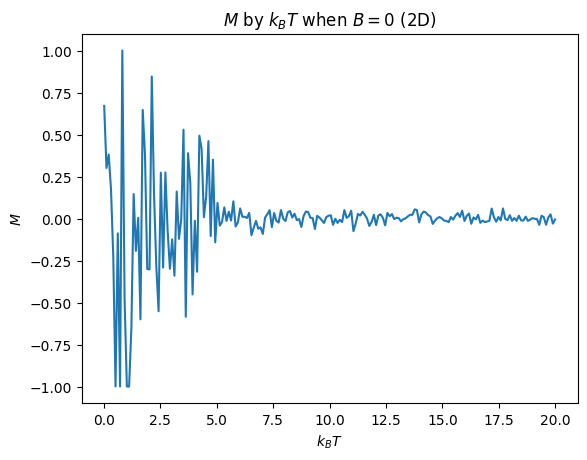

In [62]:
N = 50
steps = 20

B = 0
points = 200
k_bTs = np.linspace(0.01, 20, points) 

res_kBT_2D = [simulate_2D(N, steps, B, k_bT) for k_bT in k_bTs]

fig, ax = plt.subplots(1, 1)
ax.plot(k_bTs, res_kBT_2D)
ax.set(xlabel = "$k_BT$", ylabel = "$M$", title = "$M$ by $k_BT$ when $B = 0$ (2D)")
plt.show()

This graph is the same as the previous one but it takes a closer look at the smaller values of $k_BT$. Specifically, the graph shows $M$ as a function of $k_BT$ (with $200$ values ranging from $0.01$ to $20$) for $B = 0$ for the 2D simulation. We see that for the lower values of $k_BT$, the value of $M$ is very volatile and the lattice can be magnetized. For some runs, $M$ becomes $1$, for others it becomes $-1$ and other values in between. 

This is consistent with the previous observation that the lattice has a greater tendency to align with each other because of the greater number of neighbors. It might be that pockets of the lattice are aligning with each other and then the rest of the lattice aligns with the pockets.